# Importing Libraries

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [31]:
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

# Data

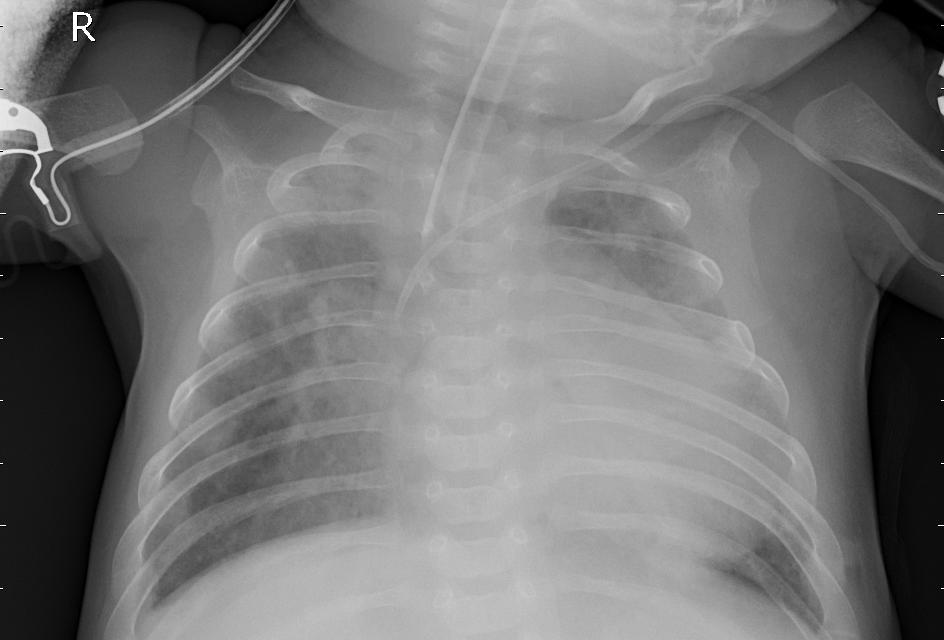

In [32]:
pneumonia_positive = PIL.Image.open('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/PNEUMONIA/person1_virus_6.jpeg')
pneumonia_positive

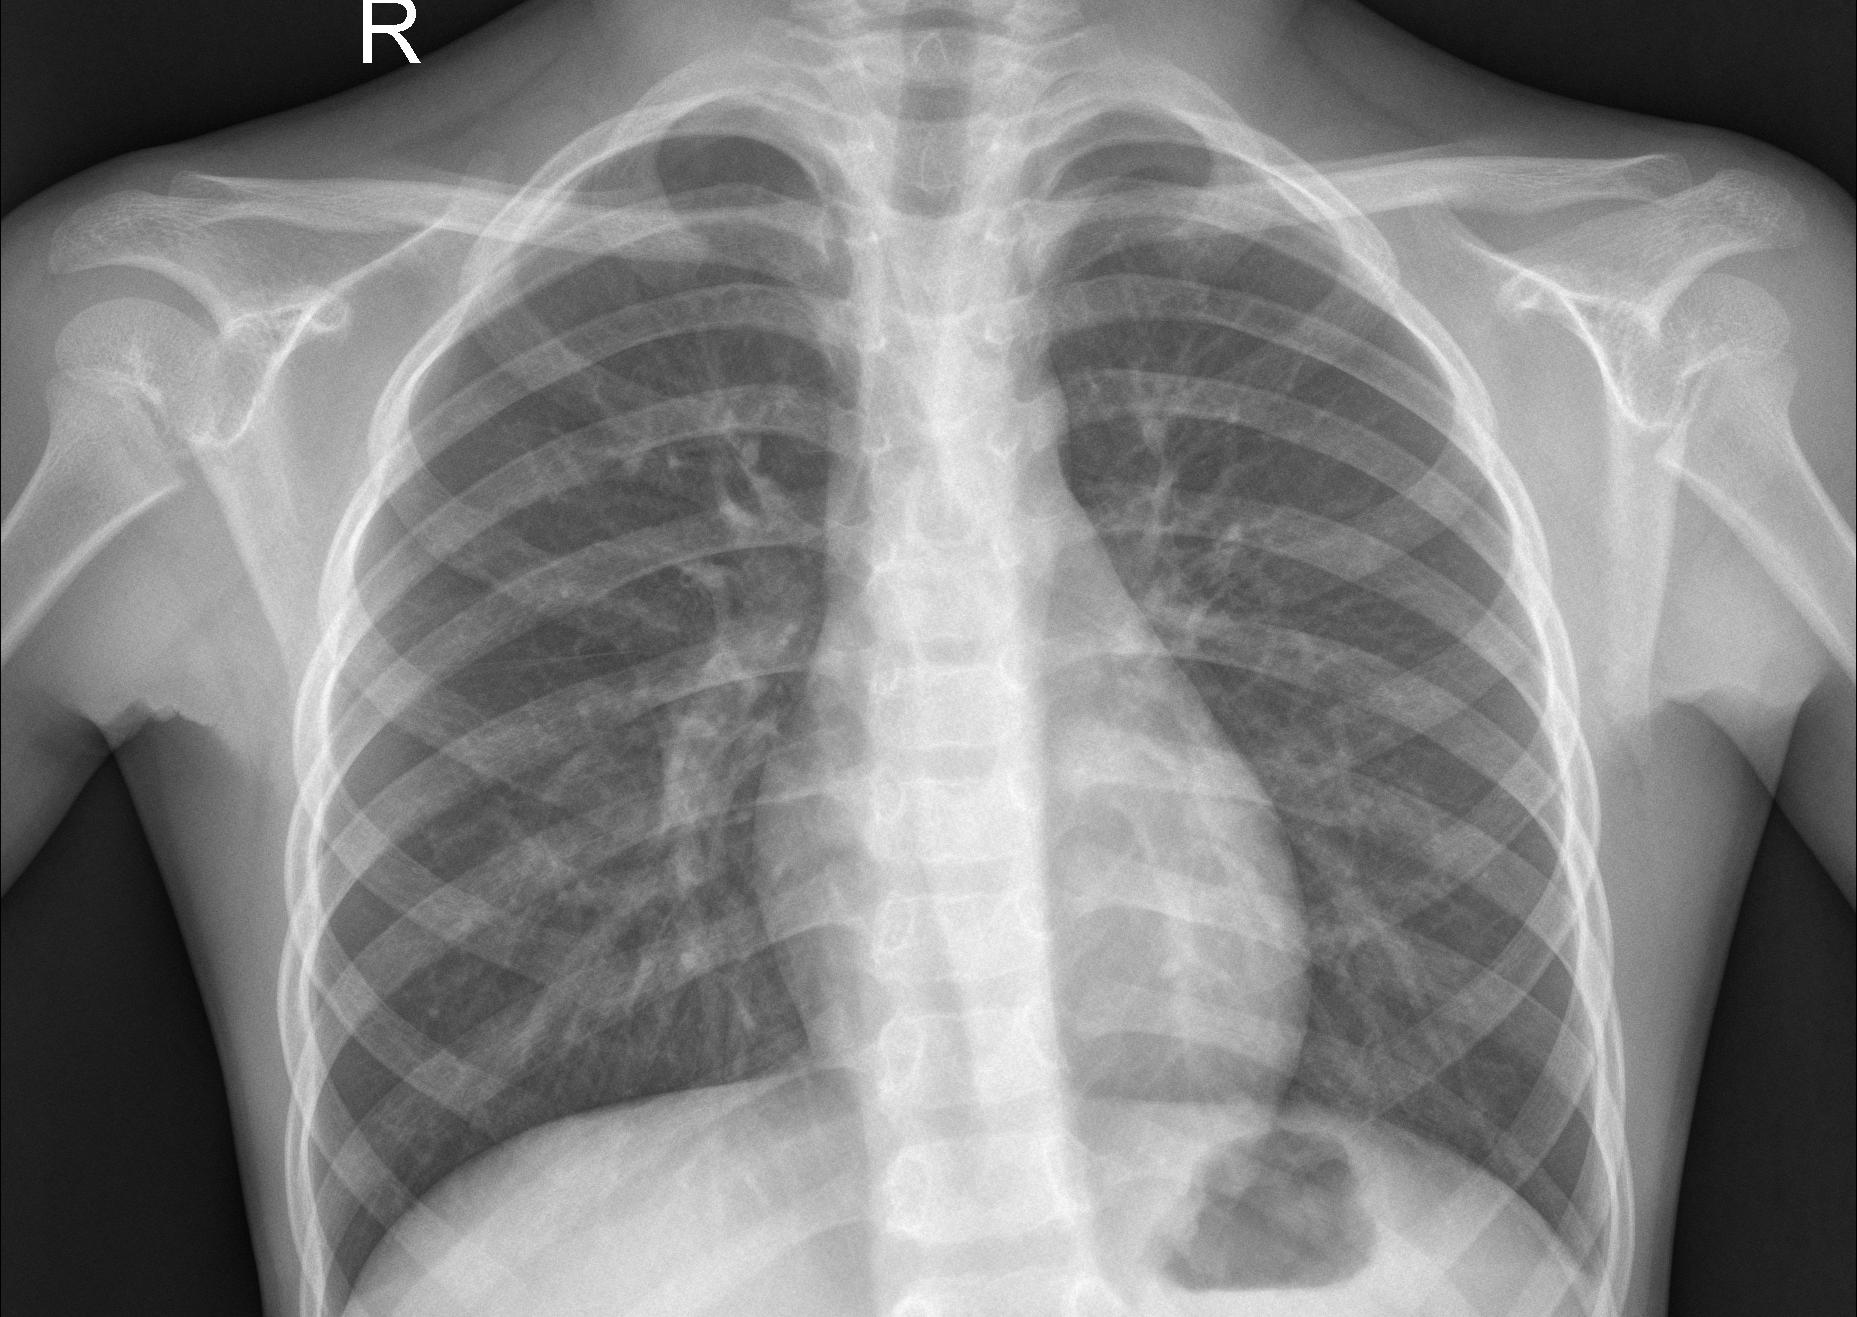

In [33]:
Normal = PIL.Image.open('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/NORMAL/IM-0001-0001.jpeg')
Normal

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing Data

In [35]:
train_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/train"
val_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/val"
test_dir = "C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test"

# Data Visualization

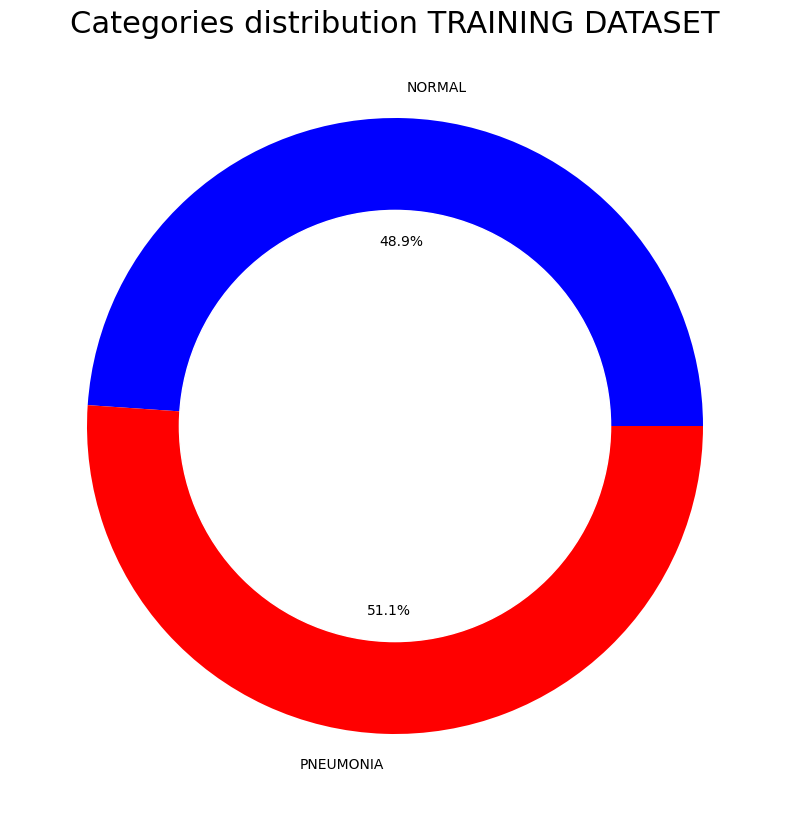

In [36]:
train_normal = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE XRAY/train/NORMAL/*.jpg'
train_pneumonia= 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE XRAY/train/PNEUMONIA/*.jpg'

def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()
    
data = [len (train_normal) , len (train_pneumonia) ]
labels = ['NORMAL' , 'PNEUMONIA' ]
colors = ['blue','red']
plt_pie (data,labels,colors , 'Categories distribution TRAINING DATASET')

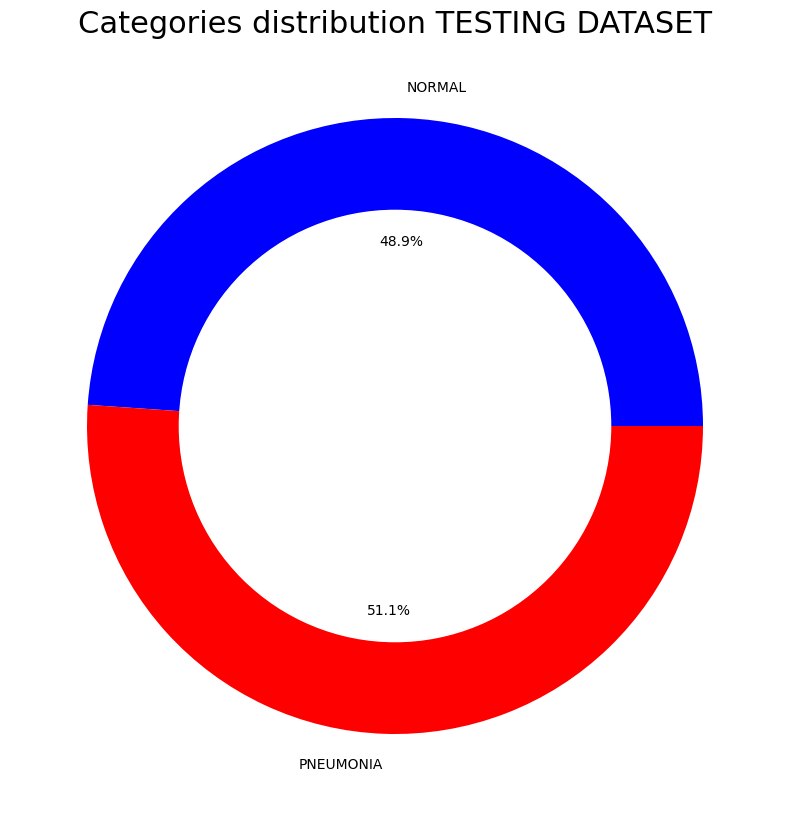

In [37]:
test_normal = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE XRAY/test/NORMAL/*.jpg'
test_pneumonia= 'C:/Users/Mukhi2206/Desktop/CAPSTONE/FRACTURE XRAY/test/PNEUMONIA/*.jpg'

def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()
    
data = [len (test_normal) , len (test_pneumonia) ]
labels = ['NORMAL' , 'PNEUMONIA' ]
colors = ['blue','red']
plt_pie (data,labels,colors , 'Categories distribution TESTING DATASET')

# Data Pre-processing

In [38]:
train_gen = ImageDataGenerator(rescale=1/255)
data_train = train_gen.flow_from_directory(train_dir, 
                                           target_size=(120,120),
                                           batch_size=8,
                                           class_mode="binary")

Found 5216 images belonging to 2 classes.


In [39]:
val_gen = ImageDataGenerator(rescale=1/255)
data_val = val_gen.flow_from_directory(val_dir, 
                                       target_size=(120,120),
                                       batch_size=8,
                                       class_mode="binary")

Found 16 images belonging to 2 classes.


In [40]:
test_gen = ImageDataGenerator(rescale=1/255)
data_test = test_gen.flow_from_directory(test_dir, 
                                         target_size=(120,120),
                                         batch_size=8,
                                         class_mode="binary")

Found 624 images belonging to 2 classes.


# CNN Model

In [41]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2), 
                             
                             tf.keras.layers.Conv2D(128, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(256, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(512, (3,3), activation="relu"), 
                             tf.keras.layers.MaxPooling2D(2,2),

                             #tf.keras.layers.Conv2D(1024, (3,3), activation="relu"), 
                             #tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Flatten(), 
                             tf.keras.layers.Dense(256, activation= 'sigmoid'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 128)      

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy", 
              metrics= ["acc"])

# Model Training

In [ ]:
history = model.fit_generator(data_train, epochs=16, validation_data = data_val) 

Epoch 1/8


C:\Users\Mukhi2206\AppData\Local\Temp\ipykernel_10308\1020708032.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train, epochs=8, validation_data = data_val)


652/652 [==============================] - 71s 109ms/step - loss: 0.0538 - acc: 0.9793 - val_loss: 0.2532 - val_acc: 0.9375
Epoch 2/8
652/652 [==============================] - 69s 106ms/step - loss: 0.0431 - acc: 0.9831 - val_loss: 0.3586 - val_acc: 0.8125
Epoch 3/8
652/652 [==============================] - 72s 111ms/step - loss: 0.0397 - acc: 0.9866 - val_loss: 0.7931 - val_acc: 0.7500
Epoch 4/8
652/652 [==============================] - 74s 114ms/step - loss: 0.0313 - acc: 0.9889 - val_loss: 0.2369 - val_acc: 0.8750
Epoch 5/8
652/652 [==============================] - 69s 106ms/step - loss: 0.0324 - acc: 0.9879 - val_loss: 0.1922 - val_acc: 0.9375
Epoch 6/8
652/652 [==============================] - 69s 105ms/step - loss: 0.0294 - acc: 0.9895 - val_loss: 0.0397 - val_acc: 1.0000
Epoch 7/8
652/652 [==============================] - 69s 106ms/step - loss: 0.0337 - acc: 0.9870 - val_loss: 0.1249 - val_acc: 0.9375
Epoch 8/8
576/652 [=========================>....] - ETA: 7s - loss: 0.0

# Plot Accuracy and Loss

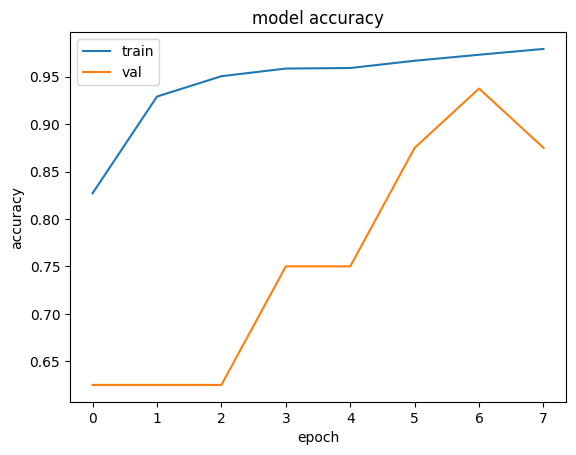

In [16]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

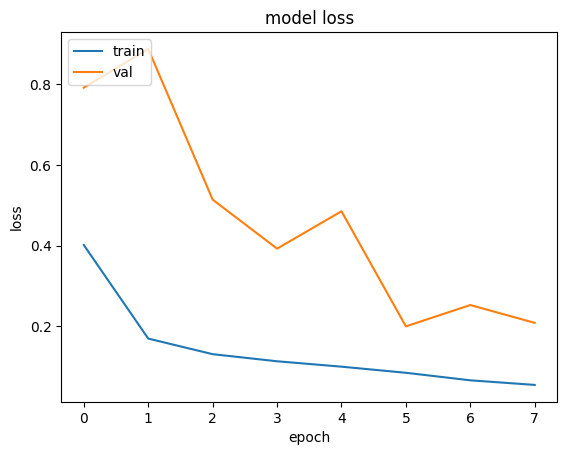

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Score

In [18]:
model.evaluate(data_test)

78/78 [==============================] - 6s 80ms/step - loss: 1.2756 - acc: 0.7756


[1.2756353616714478, 0.7756410241127014]

In [19]:
model.evaluate(data_val)

2/2 [==============================] - 0s 92ms/step - loss: 0.2089 - acc: 0.8750


[0.2088613212108612, 0.875]

In [20]:
predictions=model.predict(data_val)
predictions

2/2 [==============================] - 0s 72ms/step


array([[0.0482652 ],
       [0.9998301 ],
       [0.99998456],
       [0.7638105 ],
       [0.00439817],
       [0.98949593],
       [0.13435118],
       [0.99915045],
       [0.99987024],
       [0.9999738 ],
       [0.06055865],
       [0.99996775],
       [0.02172589],
       [0.71162367],
       [0.9999783 ],
       [0.30286697]], dtype=float32)

# Predictions

1/1 [==============================] - 0s 125ms/step
[[0.09520853]]
RESULT : Normal


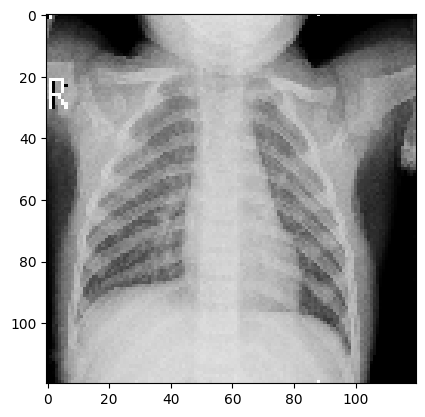

In [21]:
from tensorflow.keras.utils import load_img, img_to_array
img1 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/val/NORMAL/NORMAL2-IM-1430-0001.jpeg',target_size=(120,120))
imag1 = img_to_array(img1)
imaga1 = np.expand_dims(imag1,axis=0) 

ypred1 = model.predict(imaga1)
print(ypred1)
a=ypred1[0]
if a>0.5:
      op="Pneumonia"   
else:
      op="Normal"
plt.imshow(img1)
print("RESULT : "+str(op))

1/1 [==============================] - 0s 37ms/step
[[0.99999774]]
RESULT : Pneumonia


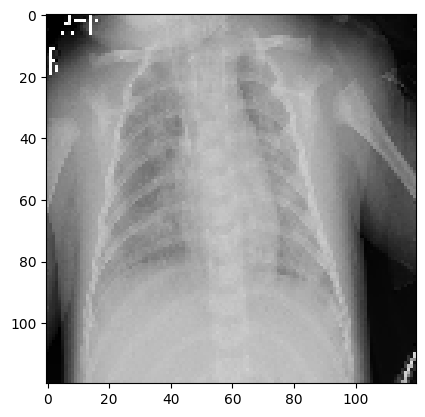

In [22]:
img2 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/val/PNEUMONIA/person1951_bacteria_4882.jpeg',target_size=(120,120))
imag2 = img_to_array(img2)
imaga2 = np.expand_dims(imag2,axis=0)

ypred2 = model.predict(imaga2)
print(ypred2)
a=ypred2[0]
if a>0.4:
      op="Pneumonia"   
else:
      op="Normal"
plt.imshow(img2)
print("RESULT : "+str(op))

1/1 [==============================] - 0s 29ms/step
[[0.79411334]]
RESULT : Pneumonia


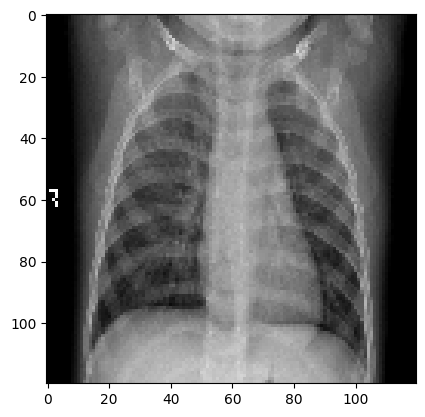

In [23]:
from tensorflow.keras.utils import load_img, img_to_array
img1 = load_img('C:/Users/Mukhi2206/Desktop/CAPSTONE/PENUMONIA dataset/test/NORMAL/NORMAL2-IM-0378-0001.jpeg',target_size=(120,120))
imag1 = img_to_array(img1)
imaga1 = np.expand_dims(imag1,axis=0) 

ypred1 = model.predict(imaga1)
print(ypred1)
a=ypred1[0]
if a>0.4:
      op="Pneumonia"   
else:
      op="Normal"
plt.imshow(img1)
print("RESULT : "+str(op))

In [ ]:
model.save('pneumonia.h5')
model.save('pneumonia.keras')